In [1]:
import torch
from torchvision import transforms, datasets

In [2]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

In [3]:
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)                             

In [4]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [5]:
model = Classifier()

images, labels = next(iter(testloader))
# Get the class probabilities
ps = torch.exp(model(images))
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


In [6]:
top_p, top_class = ps.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])

tensor([[2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2]])


In [7]:
equals = top_class == labels.view(*top_class.shape)

In [9]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')
print(len(trainloader), len(testloader))

Accuracy: 12.5%
938 157


In [10]:

model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 3
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:

        optimizer.zero_grad()

        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    else:
        
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)

                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
        
        
        accuracy = torch.mean(equals.type(torch.FloatTensor))
        print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 62.5%
Accuracy: 87.5%
Accuracy: 87.5%


In [17]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        self.dropout = nn.Dropout(p = 0.3)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [21]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 15
steps = 0

for e in range(epochs):
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        logits = model(images)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        
    else:
        
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                logits = model(images)
                ps = torch.exp(logits)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
            model.train()    
        accuracy = torch.mean(equals.type(torch.FloatTensor))
        print(f'Accuracy: {accuracy.item()*100}%')  
        

Accuracy: 87.5%
Accuracy: 87.5%
Accuracy: 75.0%
Accuracy: 56.25%
Accuracy: 87.5%
Accuracy: 87.5%
Accuracy: 100.0%
Accuracy: 87.5%
Accuracy: 81.25%
Accuracy: 81.25%
Accuracy: 68.75%
Accuracy: 87.5%
Accuracy: 81.25%
Accuracy: 100.0%
Accuracy: 93.75%


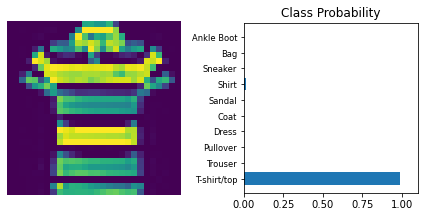

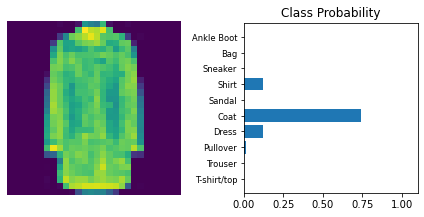

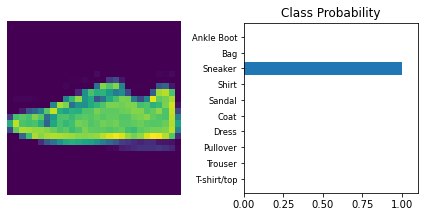

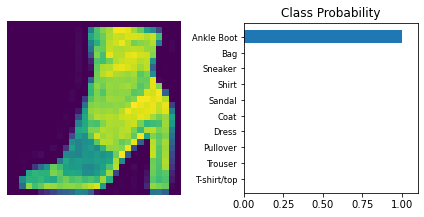

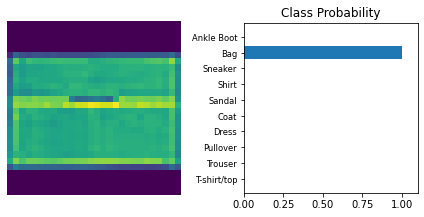

In [29]:
# Import helper module (should be in the repo)
import utilities

# Test out your network!

model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
for i in range(5):
    img = images[i]
    # Convert 2D image to 1D vector
    img = img.view(1, 784)

    # Calculate the class probabilities (softmax) for img
    with torch.no_grad():
        output = model.forward(img)

    ps = torch.exp(output)

    # Plot the image and probabilities
    utilities.view_classify(img.view(1, 28, 28), ps, version='Fashion')